In [1]:
# Use the Moving Average Convergence/DIvergence crossover to determine when to buy and sell stock

In [2]:
import pandas as pd
import numpy as np
import pandas_datareader as web
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [8]:
#Get the stock quote
df = web.DataReader('FB', data_source='yahoo', start='2019-05-01', end='2020-05-31')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-05-01,196.179993,193.009995,194.779999,193.029999,15996600,193.029999
2019-05-02,194.000000,189.750000,193.000000,192.529999,13209500,192.529999
2019-05-03,196.160004,193.710007,194.380005,195.470001,14575400,195.470001
2019-05-06,194.279999,190.550003,191.240005,193.880005,13994900,193.880005
2019-05-07,192.899994,187.850006,192.539993,189.770004,16253000,189.770004
...,...,...,...,...,...,...
2020-05-22,235.990005,228.740005,231.509995,234.910004,33925600,234.910004
2020-05-26,240.899994,231.669998,239.770004,232.199997,33178300,232.199997
2020-05-27,230.559998,221.130005,229.070007,229.139999,34697600,229.139999


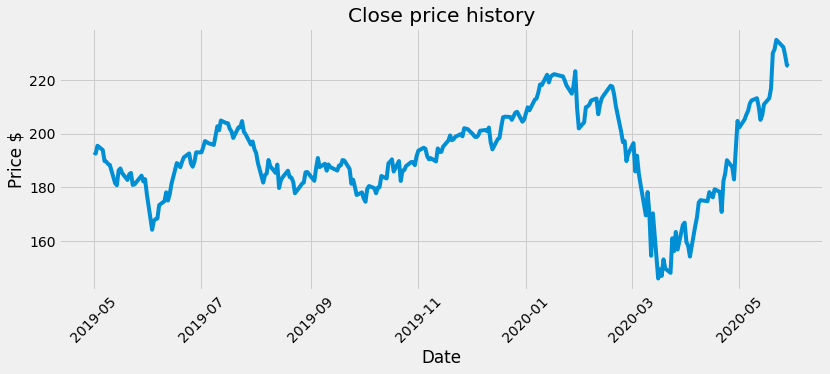

In [9]:
# Visualize the stock price
plt.figure(figsize=(12.2, 4.5))
plt.plot(df['Close'], label='Close')
plt.xticks(rotation=45)
plt.title('Close price history')
plt.xlabel('Date')
plt.ylabel('Price $')
plt.show()

In [10]:
# Calculate the MACD and signal line indicators
# Calculate the Short Term Exponential moving average
shortEMA = df.Close.ewm(span=12, adjust=False).mean()
# Calculate the Long Term Exponential moving average
longEMA = df.Close.ewm(span=26, adjust=False).mean()
# Calculate the MACD line
MACD = shortEMA - longEMA
# Calculate the signal line
signal = MACD.ewm(span=9, adjust=False).mean()

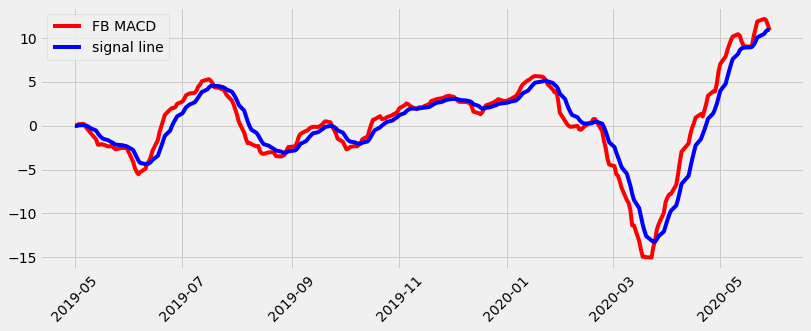

In [11]:
# PLot the calculations
plt.figure(figsize=(12.2, 4.5))
plt.plot(df.index, MACD, label='FB MACD', color='red')
plt.plot(df.index, signal, label='signal line', color='blue')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

In [12]:
# Create new columns for preparing the data
df['MACD'] = MACD
df['signal line'] = signal
df.head()

,High,Low,Open,Close,Volume,Adj Close,MACD,signal line
Date,,,,,,,,
2019-05-01,196.179993,193.009995,194.779999,193.029999,15996600,193.029999,0.000000,0.000000
2019-05-02,194.000000,189.750000,193.000000,192.529999,13209500,192.529999,-0.039886,-0.007977
2019-05-03,196.160004,193.710007,194.380005,195.470001,14575400,195.470001,0.163849,0.026388
2019-05-06,194.279999,190.550003,191.240005,193.880005,13994900,193.880005,0.194766,0.060064
2019-05-07,192.899994,187.850006,192.539993,189.770004,16253000,189.770004,-0.111095,0.025832


In [20]:
# Function that says when to sell or buy an asset according to the MACD and signal line
def buy_sell(signal):
  buy = []
  sell = []
  flag = -1
  for i in range(len(signal)):
    if signal['MACD'][i] > signal['signal line'][i]:
      sell.append(np.nan)
      if flag != 1:
        buy.append(signal['Close'][i])
        flag = 1
      else:
        buy.append(np.nan)
    elif signal['MACD'][i] < signal['signal line'][i]:
      buy.append(np.nan)
      if flag != 0:
        sell.append(signal['Close'][i])
        flag = 0
      else:
        sell.append(np.nan)
    else:
      sell.append(np.nan)
      buy.append(np.nan)
  return (buy, sell)

In [21]:
# Create buy and sell column
a = buy_sell(df)
df['Buy Signal Price'] = a[0]
df['Sell Signal Price'] = a[1]

In [22]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,MACD,signal line,Buy Signal Price,Sell Signal Price
Date,,,,,,,,,,
2019-05-01,196.179993,193.009995,194.779999,193.029999,15996600,193.029999,0.000000,0.000000,NaN,NaN
2019-05-02,194.000000,189.750000,193.000000,192.529999,13209500,192.529999,-0.039886,-0.007977,NaN,192.529999
2019-05-03,196.160004,193.710007,194.380005,195.470001,14575400,195.470001,0.163849,0.026388,195.470001,NaN
2019-05-06,194.279999,190.550003,191.240005,193.880005,13994900,193.880005,0.194766,0.060064,NaN,NaN
2019-05-07,192.899994,187.850006,192.539993,189.770004,16253000,189.770004,-0.111095,0.025832,NaN,189.770004


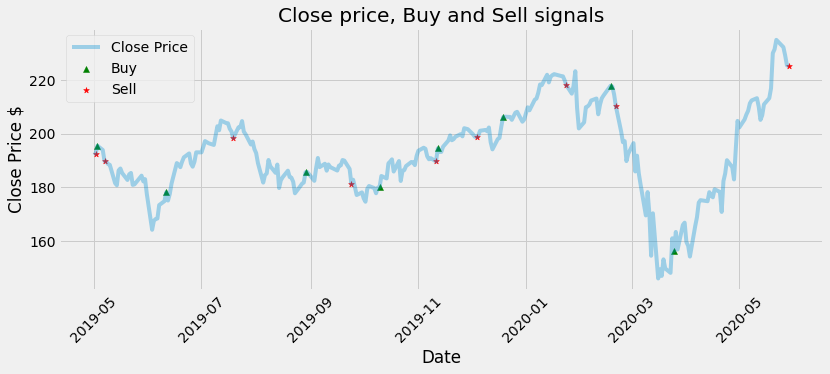

In [24]:
# SHow the buy and sell signals
plt.figure(figsize=(12.2, 4.5))
plt.scatter(df.index, df['Buy Signal Price'], color='green', label='Buy', marker='^', alpha=1)
plt.scatter(df.index, df['Sell Signal Price'], color='red', label='Sell', marker='*', alpha=1)
plt.plot(df['Close'], label='Close Price', alpha=0.35)
plt.title('Close price, Buy and Sell signals')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Price $')
plt.legend(loc='upper left')
plt.show()